Número de plantas detectadas: 29


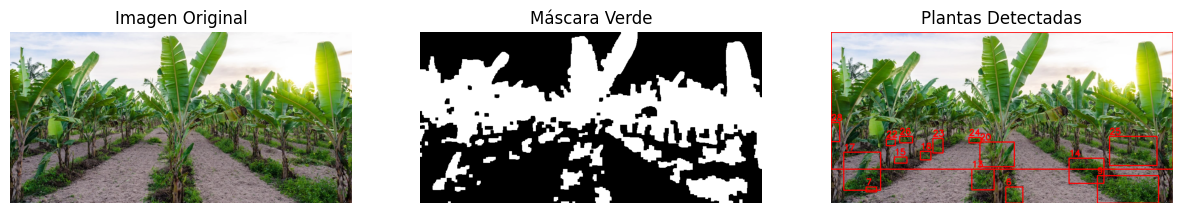

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen
img = cv2.imread("cultivo platano.webp")

# Convertir de BGR (OpenCV) a RGB (para visualización)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Convertir a HSV para segmentar el color verde
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Rango de verdes (puede ajustarse según la iluminación)
lower_green = np.array([30, 40, 40])
upper_green = np.array([85, 255, 255])

# 3. Crear máscara para lo verde
mask = cv2.inRange(hsv, lower_green, upper_green)

# 4. Aplicar operaciones morfológicas para limpiar ruido
kernel = np.ones((7,7), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 5. Detectar contornos de las plantas
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 6. Dibujar contornos y contar plantas
output = img_rgb.copy()
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    if w*h > 300:  # filtro para evitar ruido muy pequeño
        cv2.rectangle(output, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(output, str(i+1), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (255,0,0), 2)

print("Número de plantas detectadas:", len(contours))

# 7. Mostrar resultados
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title("Imagen Original"); plt.imshow(img_rgb); plt.axis("off")
plt.subplot(1,3,2); plt.title("Máscara Verde"); plt.imshow(mask_clean, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Plantas Detectadas"); plt.imshow(output); plt.axis("off")
plt.savefig(r"C:\Users\marco\Downloads\deteccion_plantas.png")
plt.show()


# Sobre la librería OpenCV  

Excelente pregunta 👌. Te cuento:

La librería **OpenCV (Open Source Computer Vision Library)**, que se importa en Python como `cv2`, es uno de los paquetes más completos para el **procesamiento de imágenes y visión por computadora**.

### 🔎 ¿Qué es OpenCV?

* Es una librería de código abierto creada inicialmente por Intel.
* Está diseñada para aplicaciones de **visión artificial** y **aprendizaje automático**.
* Permite procesar imágenes, reconocer patrones, detectar objetos, analizar movimiento y trabajar con cámaras en tiempo real.
* Funciona en C++, Python, Java y otros lenguajes.

---

### 🚜 Potencialidad de OpenCV en **Ingeniería Agropecuaria**, particularmente en Caucasia, Antioquia

El Bajo Cauca antioqueño es una región con gran actividad agrícola (arroz, maíz, cacao, plátano, yuca, ganadería) y un fuerte interés en modernizar procesos productivos. Ahí OpenCV puede jugar un papel muy importante:

#### 1. **Monitoreo de cultivos con drones**

* Procesamiento de imágenes aéreas tomadas con drones.
* Identificación de **áreas afectadas por plagas, malezas o sequías**.
* Análisis del **índice de vegetación (NDVI)** para evaluar la salud de las plantas.
* Segmentación de parcelas para optimizar uso de agua y fertilizantes.

#### 2. **Clasificación y calidad de productos agrícolas**

* Uso de visión artificial para **clasificar frutas, granos o semillas** según tamaño, color y madurez.
* Detectar defectos en productos antes de empacarlos.
* Estandarización en procesos de comercialización local e internacional.

#### 3. **Ganadería inteligente**

* Reconocimiento visual para **contar ganado** automáticamente.
* Monitoreo de la **condición corporal de bovinos** usando imágenes o videos.
* Detección temprana de enfermedades a partir de patrones en piel, ojos o comportamiento.

#### 4. **Agricultura de precisión**

* Identificación de **estrés hídrico** en cultivos mediante análisis de coloración en hojas.
* Mapas de calor sobre parcelas para determinar la variabilidad espacial.
* Detección automática de **malezas** para reducir el uso indiscriminado de herbicidas.

#### 5. **Sistemas de riego inteligentes**

* Cámaras que analicen el color y textura del suelo para decidir cuándo activar riego.
* Control de caudales con visión artificial para optimizar agua en zonas con alta temperatura, como Caucasia.

---

### 📚 Ejemplo simple en Python con OpenCV

Detectar zonas verdes en una imagen de cultivo:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread("cultivo.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir a espacio HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Rango de color verde
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Crear máscara para áreas verdes
mask = cv2.inRange(hsv, lower_green, upper_green)
res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# Mostrar resultados
plt.subplot(1,2,1); plt.title("Imagen Original"); plt.imshow(img_rgb)
plt.subplot(1,2,2); plt.title("Áreas Verdes Detectadas"); plt.imshow(res)
plt.show()
```

Con esto se pueden extraer métricas sobre **porcentaje de área verde**, indicador de salud del cultivo.

---

👉 En resumen, **OpenCV puede convertirse en un aliado estratégico para la agroindustria en Caucasia**, apoyando la **agricultura de precisión, la sostenibilidad y la eficiencia productiva** mediante herramientas de visión por computador.

¿Quieres que te diseñe un **mini-proyecto aplicado** (ejemplo: detección de maleza en arrozales del Bajo Cauca usando OpenCV y Python)?
